## Credit card fraud detection

### Introduction

The datasets contains transactions made by credit cards in September 2013 by european cardholders. 

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

**The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;

The only features which have not been transformed with PCA are Time and Amount.

Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The feature Amount is the transaction Amount..

**Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

### Imbalance data

In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

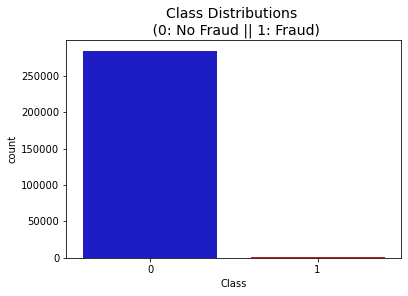

In [7]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Plot Distributions of Time and Amount features

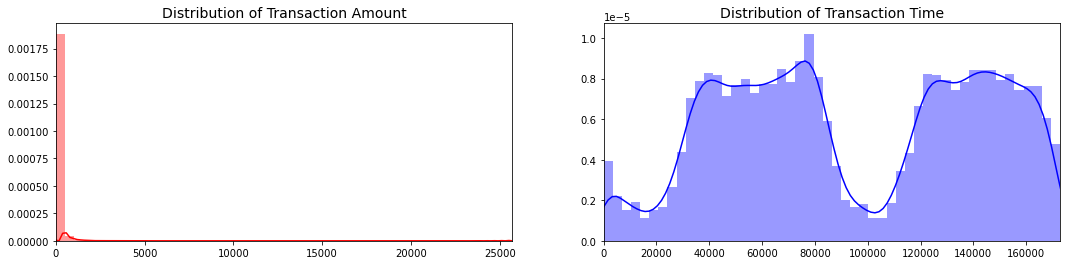

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values


sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])


sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [9]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Box plot of Amount feature

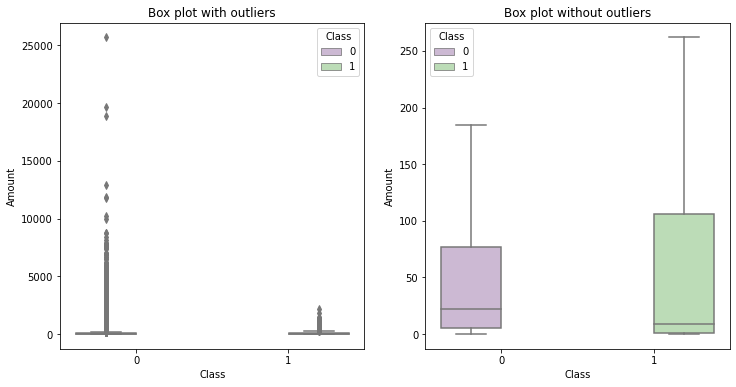

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, 
                palette="PRGn",showfliers=True)

s.set_title("Box plot with outliers")

s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, 
                palette="PRGn",showfliers=False)
s.set_title("Box plot without outliers")

plt.show()

In [11]:
#tmp = df[['Amount','Class']].copy()
class_0 = df.loc[df['Class'] == 0]['Amount']
class_1 = df.loc[df['Class'] == 1]['Amount']
#class_0.describe()

info=pd.concat((class_0.describe(),class_1.describe()),axis=1)

In [12]:
info.columns=['non-fraud','fraud']
info

,non-fraud,fraud
count,284315.000000,492.000000
mean,88.291022,122.211321
std,250.105092,256.683288
min,0.000000,0.000000
25%,5.650000,1.000000
50%,22.000000,9.250000
75%,77.050000,105.890000
max,25691.160000,2125.870000


### Correlation Matrix

**Note:**

We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

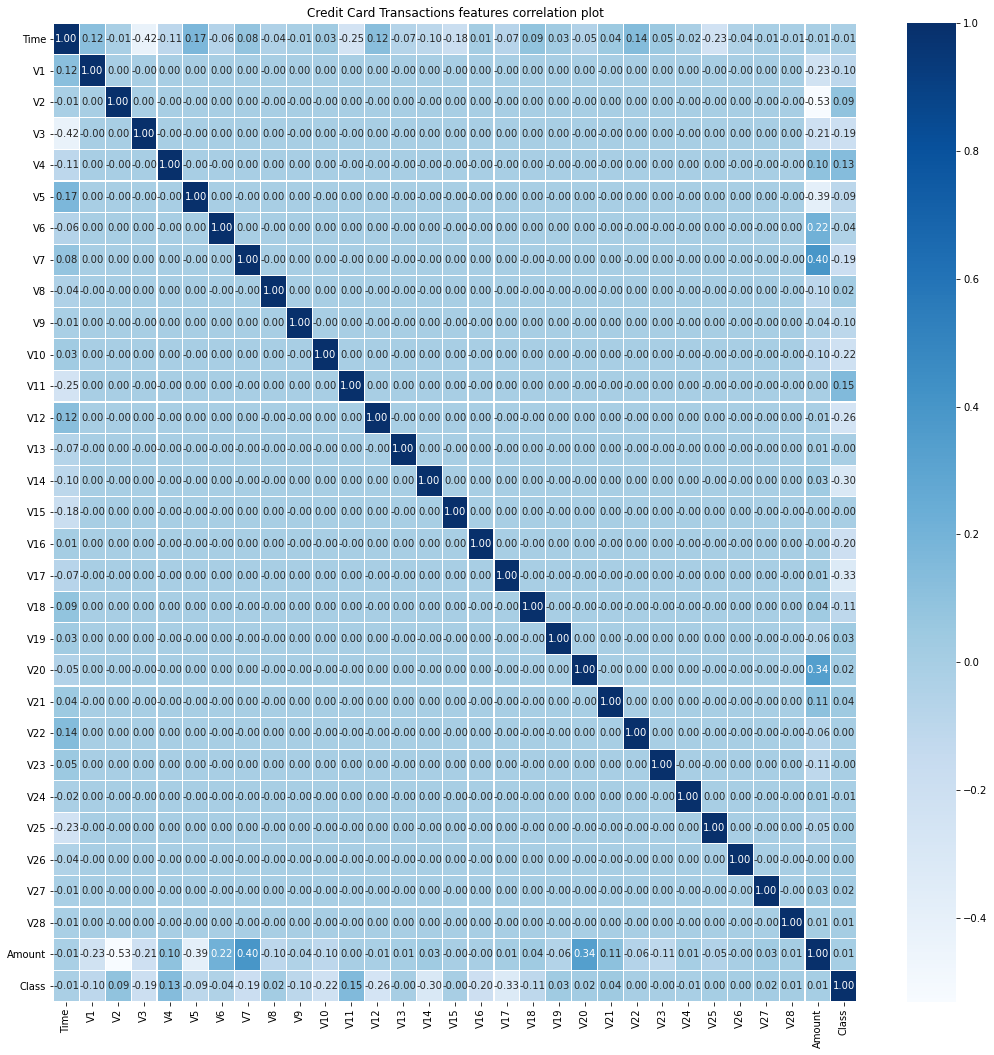

In [13]:
plt.figure(figsize = (18,18))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues",annot=True, fmt=".2f")
plt.show()

### Scaling and subsampling

Time and amount should be scaled as the other columns. 

On the other hand, **we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.**

### What is a sub-Sample?

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

### Why do we create a sub-Sample?

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

- **Overfitting:** Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

- **Wrong Correlations:** Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [15]:
# RobustScaler is less prone to outliers.

#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
df.scaled_amount.describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: scaled_amount, dtype: float64

### Random Under-Sampling

**Random Under Sampling** which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [18]:
df[df.Class==0].sample(n=492,random_state=10).Class.value_counts()

0    492
Name: Class, dtype: int64

In [19]:
#df = df.sample(n=492)
#frac=1,means return all samples

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
#non_fraud_df = df.loc[df['Class'] == 0][:492]
non_fraud_df=df[df.Class==0].sample(n=492,random_state=10)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
41913,0.433173,-0.514679,0.400253,-0.292695,0.951298,-1.547348,-0.753840,-0.134998,-0.602733,-0.785239,...,-0.066418,0.757832,-0.517013,-0.000553,-0.305356,0.842713,-0.422858,0.042048,0.077473,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
22695,3.710333,-0.614504,-0.666491,-0.817702,1.535415,-1.215711,-0.989454,-0.101817,0.943780,-0.256187,...,0.921780,0.277920,0.604367,0.594274,0.127735,-0.227041,0.079391,-0.160239,-0.150823,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [20]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

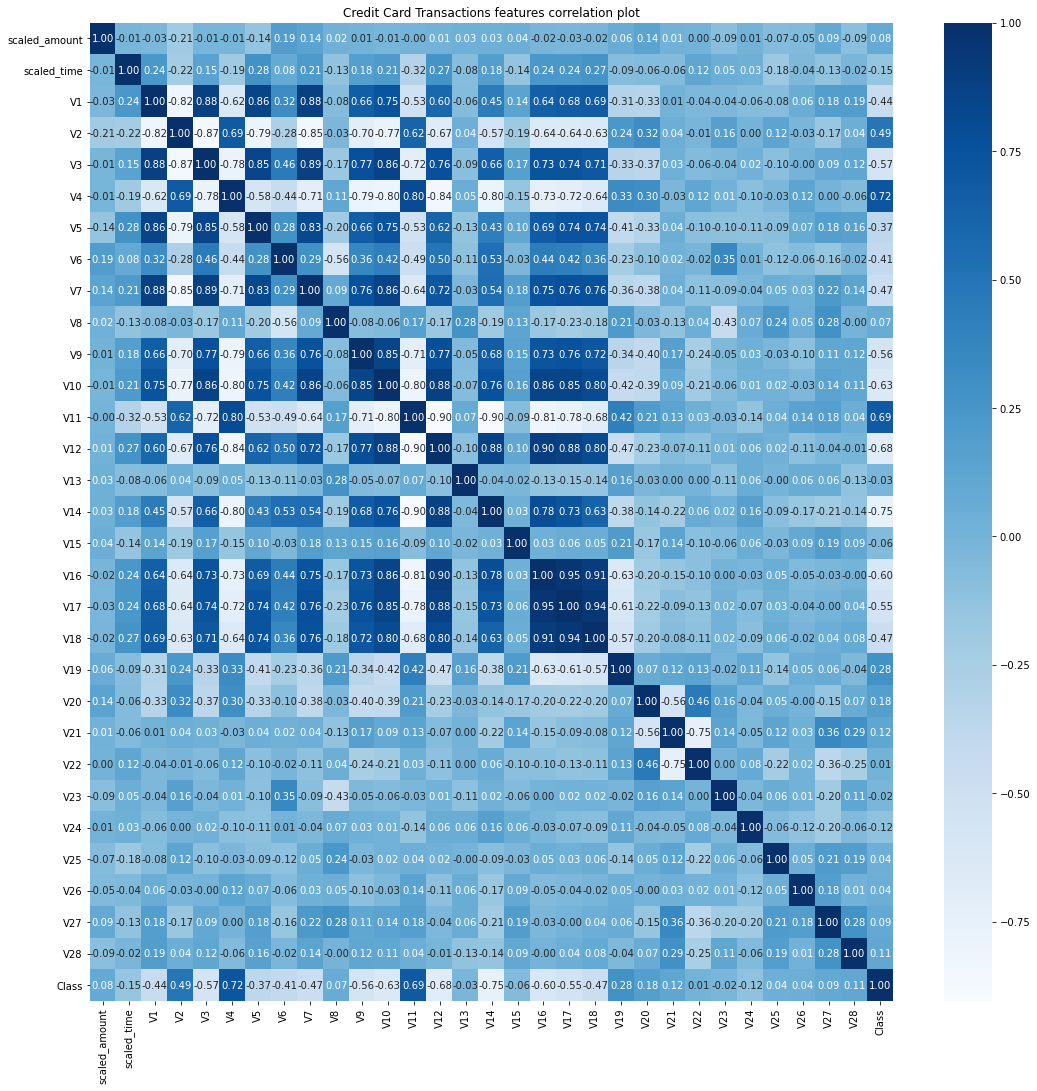

In [21]:
plt.figure(figsize = (18,18))
plt.title('Credit Card Transactions features correlation plot')
corr = new_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
            cmap="Blues",annot=True, fmt=".2f")
plt.show()

**Negative Correlations:** V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.


**Positive Correlations:** V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

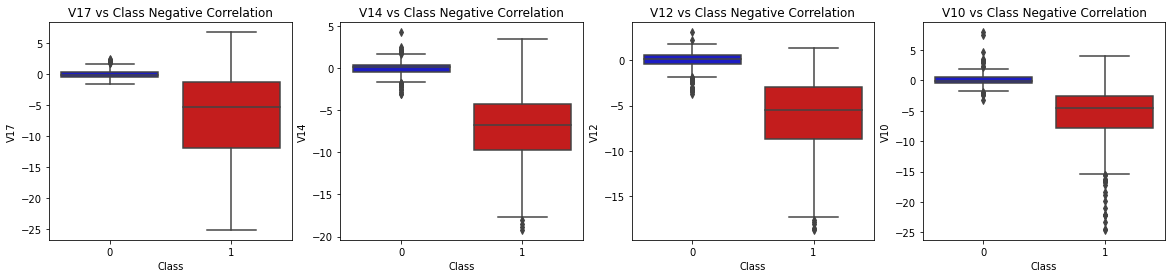

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more 
#likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

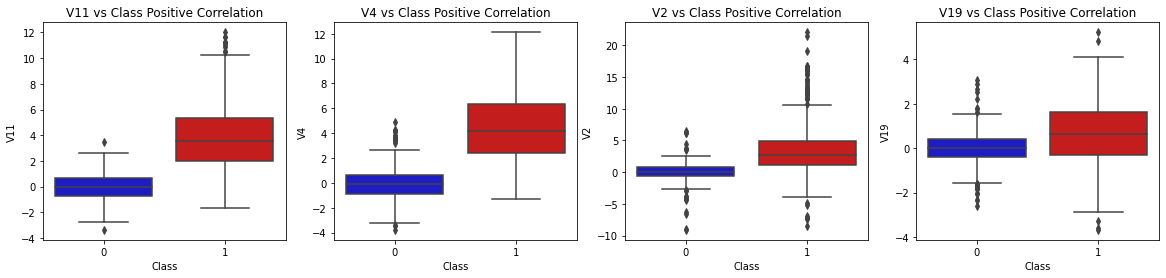

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

#### Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models. 


Box plots provide us with a good intuition about outliers as all transactions outside of 1.5 times the IQR (Inter-Quartile Range) are usually considered to be outliers.

However, removing all transactions outside of 1.5 times the IQR would dramatically decrease our training data size, which is not very large, to begin with. Thus, we have to only focus on extreme outliers outside of 2.5 times the IQR.

**Reference: More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)**

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

### V14 Removing Outliers (Highest Negative Correlated with Labels)

In [24]:
v14_fraud = new_df[new_df['Class']==1].V14.values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

In [25]:
#v14_fraud
v14_iqr = q75 - q25
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print('iqr: {}'.format(v14_iqr))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519


In [26]:
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122


In [27]:
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.049997689859396]


In [28]:
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

In [29]:
new_df.shape

(979, 31)

In [30]:
492*2

984

### V12 removing outliers from fraud transactions

In [31]:
v12_fraud = new_df[new_df['Class']==1].V12.values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

In [32]:
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))

print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.683714633344298, -18.4311310279993, -18.047596570821604, -18.553697009645802]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975


### V10 removing outliers from fraud transactions

In [33]:
v10_fraud = new_df[new_df['Class']==1].V10.values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-18.2711681738888, -24.5882624372475, -15.346098846877501, -19.836148851696, -14.9246547735487, -16.3035376590131, -22.1870885620007, -15.563791338730098, -20.949191554361104, -22.1870885620007, -15.2399619587112, -22.1870885620007, -16.6011969664137, -15.2318333653018, -23.2282548357516, -16.2556117491401, -14.9246547735487, -17.141513641289198, -15.2399619587112, -15.124162814494698, -22.1870885620007, -16.6496281595399, -24.403184969972802, -15.1237521803455, -16.7460441053944, -15.563791338730098, -18.9132433348732]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 946


### plot box plot 

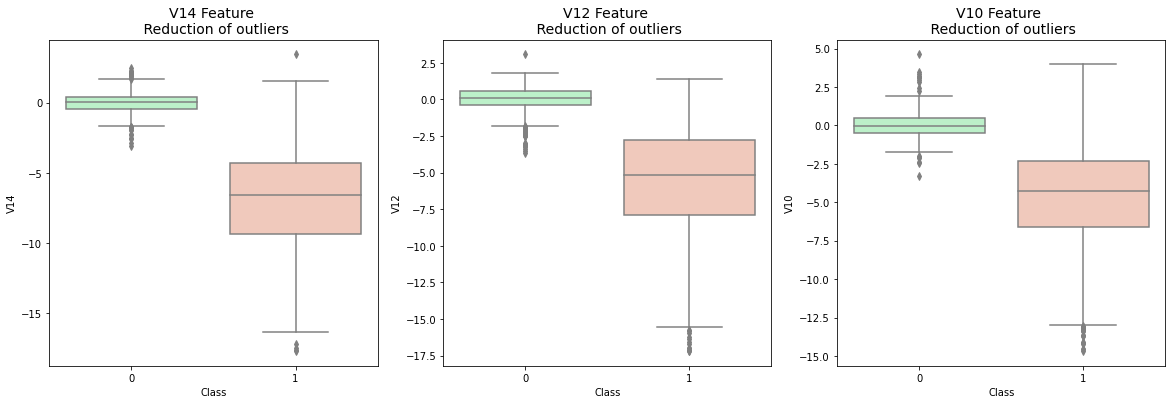

In [34]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)



plt.show()

### Dimensionality Reduction for data visualization

**Understanding t-SNE:**
t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.

In [35]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [36]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

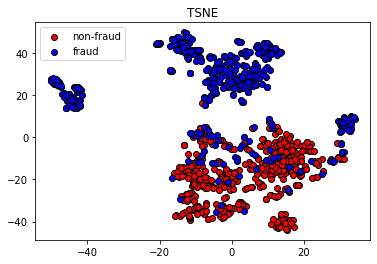

In [37]:
for i,color in zip(y,['red','blue']):
    plt.scatter(X_reduced_tsne[y==i,0],X_reduced_tsne[y==i,1],c=color,edgecolors='k')

plt.legend(['non-fraud','fraud'])
plt.title('TSNE')
plt.show()

In [38]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [39]:
X.shape

(946, 30)

In [40]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()

In [43]:
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
log.score(X_test,y_test)

0.9263157894736842

In [45]:
log.score(X_train,y_train)

0.9616402116402116